In [ ]:
###############################################################
# 연관 규칙(Association Rule)
###############################################################


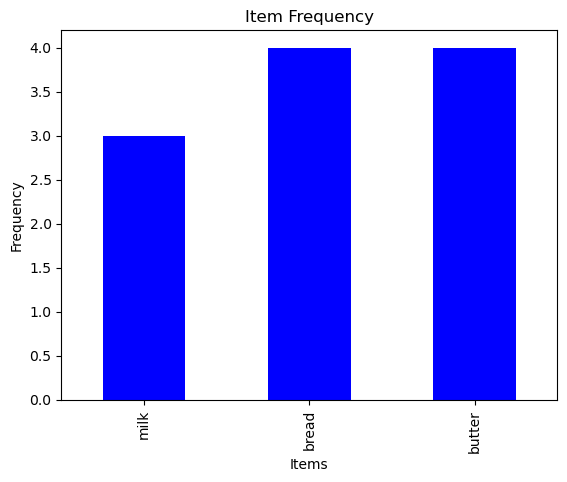

Association Rules:
  antecedents consequents  support  confidence      lift
0     (bread)      (milk)      0.4    0.500000  0.833333
1      (milk)     (bread)      0.4    0.666667  0.833333
2    (butter)      (milk)      0.4    0.500000  0.833333
3      (milk)    (butter)      0.4    0.666667  0.833333
4    (butter)     (bread)      0.6    0.750000  0.937500
5     (bread)    (butter)      0.6    0.750000  0.937500


C:\python\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# [1] Apriori
import pandas as pd
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt
from itertools import combinations

# 데이터셋 생성
data = {
    'TID': [1, 2, 3, 4, 5],
    'milk': [1, 1, 0, 1, 0],
    'bread': [1, 1, 1, 0, 1],
    'butter': [0, 1, 1, 1, 1],
}
df = pd.DataFrame(data).set_index('TID')

# 데이터 시각화
item_counts = df.sum()
item_counts.plot(kind='bar', color='blue')
plt.title('Item Frequency')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.show()

# apriori 알고리즘 적용
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

# 수동으로 연관 규칙 계산
rules = []
for itemset in frequent_itemsets['itemsets']:
    if len(itemset) > 1:
        for antecedent in combinations(itemset, len(itemset) - 1):
            antecedent = frozenset(antecedent)
            consequent = itemset - antecedent

            # 지지도 계산
            support = frequent_itemsets[frequent_itemsets['itemsets'] == itemset]['support'].values[0]

            # 신뢰도 계산
            antecedent_support = frequent_itemsets[frequent_itemsets['itemsets'] == antecedent]['support'].values[0]
            confidence = support / antecedent_support

            # 향상도 계산
            consequent_support = frequent_itemsets[frequent_itemsets['itemsets'] == consequent]['support'].values[0]
            lift = confidence / consequent_support

            # 규칙 저장
            rules.append({
                'antecedents': antecedent,
                'consequents': consequent,
                'support': support,
                'confidence': confidence,
                'lift': lift
            })

# 결과를 DataFrame으로 변환하여 출력
rules_df = pd.DataFrame(rules)
print("Association Rules:")
print(rules_df[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


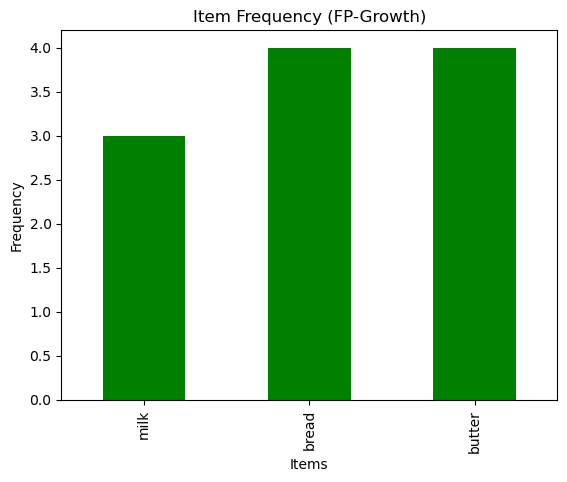

Association Rules (FP-Growth):
  antecedents consequents  support  confidence      lift
0    (butter)     (bread)      0.6    0.750000  0.937500
1     (bread)    (butter)      0.6    0.750000  0.937500
2     (bread)      (milk)      0.4    0.500000  0.833333
3      (milk)     (bread)      0.4    0.666667  0.833333
4    (butter)      (milk)      0.4    0.500000  0.833333
5      (milk)    (butter)      0.4    0.666667  0.833333


C:\python\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# [2] FP-Growth(Frequent Pattern Growth)
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth
import matplotlib.pyplot as plt
from itertools import combinations

# 데이터셋 생성
data = {
    'TID': [1, 2, 3, 4, 5],
    'milk': [1, 1, 0, 1, 0],
    'bread': [1, 1, 1, 0, 1],
    'butter': [0, 1, 1, 1, 1],
}
df = pd.DataFrame(data).set_index('TID')

# 데이터 시각화
item_counts = df.sum()
item_counts.plot(kind='bar', color='green')
plt.title('Item Frequency (FP-Growth)')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.show()

# FP-Growth 알고리즘 적용
frequent_itemsets = fpgrowth(df, min_support=0.4, use_colnames=True)

# 수동으로 연관 규칙 계산
rules = []
for itemset in frequent_itemsets['itemsets']:
    if len(itemset) > 1:
        for antecedent in combinations(itemset, len(itemset) - 1):
            antecedent = frozenset(antecedent)
            consequent = itemset - antecedent

            # 지지도 계산
            support = frequent_itemsets[frequent_itemsets['itemsets'] == itemset]['support'].values[0]

            # 신뢰도 계산
            antecedent_support = frequent_itemsets[frequent_itemsets['itemsets'] == antecedent]['support'].values[0]
            confidence = support / antecedent_support

            # 향상도 계산
            consequent_support = frequent_itemsets[frequent_itemsets['itemsets'] == consequent]['support'].values[0]
            lift = confidence / consequent_support

            # 규칙 저장
            rules.append({
                'antecedents': antecedent,
                'consequents': consequent,
                'support': support,
                'confidence': confidence,
                'lift': lift
            })

# 결과를 DataFrame으로 변환하여 출력
rules_df = pd.DataFrame(rules)
print("Association Rules (FP-Growth):")
print(rules_df[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


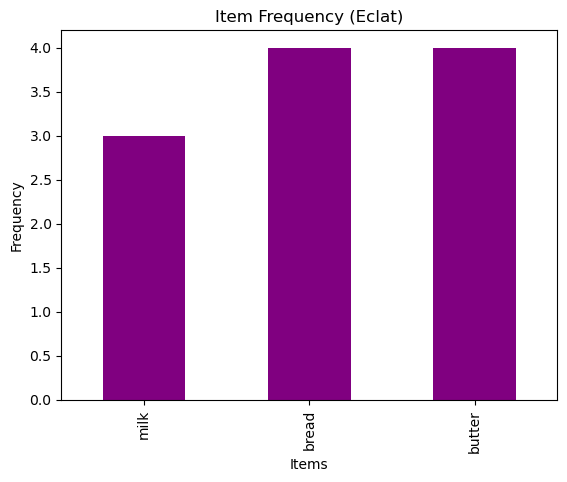

Association Rules (Eclat):
  antecedents consequents  support  confidence      lift
0     (bread)      (milk)      0.4    0.500000  0.833333
1      (milk)     (bread)      0.4    0.666667  0.833333
2    (butter)      (milk)      0.4    0.500000  0.833333
3      (milk)    (butter)      0.4    0.666667  0.833333
4    (butter)     (bread)      0.6    0.750000  0.937500
5     (bread)    (butter)      0.6    0.750000  0.937500


In [ ]:
# [3] Eclat(Equivalence Class Transformation)
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# 데이터셋 생성
data = {
    'TID': [1, 2, 3, 4, 5],
    'milk': [1, 1, 0, 1, 0],
    'bread': [1, 1, 1, 0, 1],
    'butter': [0, 1, 1, 1, 1],
}
df = pd.DataFrame(data).set_index('TID')

# 데이터 시각화
item_counts = df.sum()
item_counts.plot(kind='bar', color='purple')
plt.title('Item Frequency (Eclat)')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.show()

# Eclat 알고리즘 구현
def eclat(data, min_support=0.4):
    # 항목별 지지도 계산
    itemsets = {}
    for col in data.columns:
        support = data[col].sum() / len(data)
        if support >= min_support:
            itemsets[frozenset([col])] = support

    # 두 개 이상의 항목 집합에 대해 지지도 계산
    for length in range(2, len(data.columns) + 1):
        for comb in combinations(data.columns, length):
            comb_set = frozenset(comb)
            support = (data[list(comb)].sum(axis=1) == length).mean()
            if support >= min_support:
                itemsets[comb_set] = support

    return itemsets

# Eclat 알고리즘 적용하여 빈발 항목 집합 생성
frequent_itemsets = eclat(df, min_support=0.4)

# 빈발 항목 집합에서 연관 규칙 계산
rules = []
for itemset, support in frequent_itemsets.items():
    if len(itemset) > 1:
        for antecedent in combinations(itemset, len(itemset) - 1):
            antecedent = frozenset(antecedent)
            consequent = itemset - antecedent

            # 신뢰도 계산
            antecedent_support = frequent_itemsets[antecedent]
            confidence = support / antecedent_support

            # 향상도 계산
            consequent_support = frequent_itemsets[consequent]
            lift = confidence / consequent_support

            # 규칙 저장
            rules.append({
                'antecedents': antecedent,
                'consequents': consequent,
                'support': support,
                'confidence': confidence,
                'lift': lift
            })

# 결과를 DataFrame으로 변환하여 출력
rules_df = pd.DataFrame(rules)
print("Association Rules (Eclat):")
print(rules_df[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


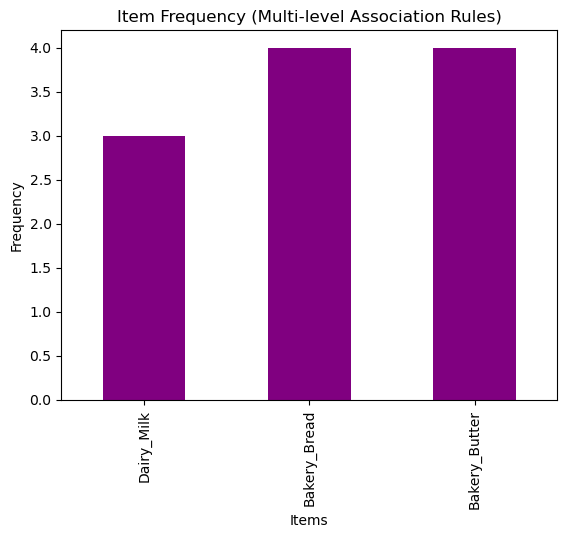

Association Rules (Upper Level):
  antecedents consequents  support  confidence  lift
0     (Dairy)    (Bakery)      0.6         1.0   1.0
1    (Bakery)     (Dairy)      0.6         0.6   1.0

Association Rules (Lower Level):
       antecedents      consequents  support  confidence      lift
0   (Bakery_Bread)     (Dairy_Milk)      0.4    0.500000  0.833333
1     (Dairy_Milk)   (Bakery_Bread)      0.4    0.666667  0.833333
2     (Dairy_Milk)  (Bakery_Butter)      0.4    0.666667  0.833333
3  (Bakery_Butter)     (Dairy_Milk)      0.4    0.500000  0.833333
4   (Bakery_Bread)  (Bakery_Butter)      0.6    0.750000  0.937500
5  (Bakery_Butter)   (Bakery_Bread)      0.6    0.750000  0.937500


C:\python\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\python\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# [4] Multi-level Association Rules
import pandas as pd
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt
from itertools import combinations

# 데이터셋 생성 (Multi-level 구조)
data = {
    'TID': [1, 2, 3, 4, 5],
    'Dairy_Milk': [1, 1, 0, 1, 0],
    'Bakery_Bread': [1, 1, 1, 0, 1],
    'Bakery_Butter': [0, 1, 1, 1, 1]
}
df = pd.DataFrame(data).set_index('TID')

# 상위 계층 데이터 생성
df['Dairy'] = df['Dairy_Milk']
df['Bakery'] = df[['Bakery_Bread', 'Bakery_Butter']].max(axis=1)

# 원본 데이터 시각화
item_counts = df[['Dairy_Milk', 'Bakery_Bread', 'Bakery_Butter']].sum()
item_counts.plot(kind='bar', color='purple')
plt.title('Item Frequency (Multi-level Association Rules)')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.show()

# 상위 계층에서 apriori 알고리즘 적용
frequent_itemsets_upper = apriori(df[['Dairy', 'Bakery']], min_support=0.4, use_colnames=True)
frequent_itemsets_upper['length'] = frequent_itemsets_upper['itemsets'].apply(lambda x: len(x))

# 하위 계층에서 apriori 알고리즘 적용
frequent_itemsets_lower = apriori(df[['Dairy_Milk', 'Bakery_Bread', 'Bakery_Butter']], min_support=0.4, use_colnames=True)
frequent_itemsets_lower['length'] = frequent_itemsets_lower['itemsets'].apply(lambda x: len(x))

# 연관 규칙 수동 계산
def generate_rules(frequent_itemsets):
    rules = []
    for itemset in frequent_itemsets['itemsets']:
        if len(itemset) > 1:
            for antecedent in combinations(itemset, len(itemset) - 1):
                antecedent = frozenset(antecedent)
                consequent = itemset - antecedent

                # 지지도 계산
                support = frequent_itemsets[frequent_itemsets['itemsets'] == itemset]['support'].values[0]

                # 신뢰도 계산
                antecedent_support = frequent_itemsets[frequent_itemsets['itemsets'] == antecedent]['support'].values[0]
                confidence = support / antecedent_support

                # 향상도 계산
                consequent_support = frequent_itemsets[frequent_itemsets['itemsets'] == consequent]['support'].values[0]
                lift = confidence / consequent_support

                # 규칙 저장
                rules.append({
                    'antecedents': antecedent,
                    'consequents': consequent,
                    'support': support,
                    'confidence': confidence,
                    'lift': lift
                })
    return rules

# 상위 계층 연관 규칙 생성
rules_upper = generate_rules(frequent_itemsets_upper)
rules_df_upper = pd.DataFrame(rules_upper)
print("Association Rules (Upper Level):")
print(rules_df_upper[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# 하위 계층 연관 규칙 생성
rules_lower = generate_rules(frequent_itemsets_lower)
rules_df_lower = pd.DataFrame(rules_lower)
print("\nAssociation Rules (Lower Level):")
print(rules_df_lower[['antecedents', 'consequents', 'support', 'confidence', 'lift']])



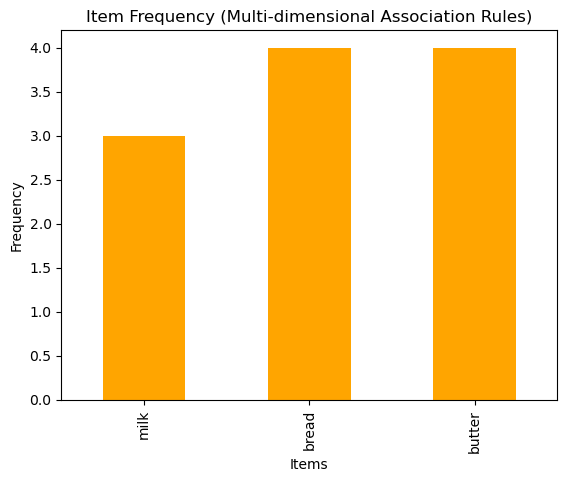

Association Rules (Multi-dimensional):
                                 antecedents        consequents  support  \
0                                    (bread)             (milk)      0.4   
1                                     (milk)            (bread)      0.4   
2                                   (butter)             (milk)      0.4   
3                                     (milk)           (butter)      0.4   
4                              (Gender_Male)             (milk)      0.4   
..                                       ...                ...      ...   
72             (milk, Category_Dairy, bread)  (Category_Bakery)      0.4   
73  (Category_Bakery, Gender_Female, butter)            (bread)      0.4   
74   (Category_Bakery, Gender_Female, bread)           (butter)      0.4   
75          (Category_Bakery, butter, bread)    (Gender_Female)      0.4   
76            (Gender_Female, butter, bread)  (Category_Bakery)      0.4   

    confidence      lift  
0     0.500000  0.833

C:\python\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# [5] Multi-dimensional Association Rules
import pandas as pd
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt
from itertools import combinations

# 데이터셋 생성 (Multi-dimensional 구조)
data = {
    'TID': [1, 2, 3, 4, 5],
    'milk': [1, 1, 0, 1, 0],
    'bread': [1, 1, 1, 0, 1],
    'butter': [0, 1, 1, 1, 1],
    'Gender_Male': [1, 0, 0, 1, 1],
    'Gender_Female': [0, 1, 1, 0, 0],
    'Category_Dairy': [1, 1, 0, 1, 0],
    'Category_Bakery': [1, 1, 1, 0, 1]
}
df = pd.DataFrame(data).set_index('TID')

# 원본 데이터 시각화
item_counts = df[['milk', 'bread', 'butter']].sum()
item_counts.plot(kind='bar', color='orange')
plt.title('Item Frequency (Multi-dimensional Association Rules)')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.show()

# apriori 알고리즘을 사용하여 빈발 항목 집합 생성
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# 연관 규칙 수동 계산
def generate_rules(frequent_itemsets):
    rules = []
    for itemset in frequent_itemsets['itemsets']:
        if len(itemset) > 1:
            for antecedent in combinations(itemset, len(itemset) - 1):
                antecedent = frozenset(antecedent)
                consequent = itemset - antecedent

                # 지지도 계산
                support = frequent_itemsets[frequent_itemsets['itemsets'] == itemset]['support'].values[0]

                # 신뢰도 계산
                antecedent_support = frequent_itemsets[frequent_itemsets['itemsets'] == antecedent]['support'].values[0]
                confidence = support / antecedent_support

                # 향상도 계산
                consequent_support = frequent_itemsets[frequent_itemsets['itemsets'] == consequent]['support'].values[0]
                lift = confidence / consequent_support

                # 규칙 저장
                rules.append({
                    'antecedents': antecedent,
                    'consequents': consequent,
                    'support': support,
                    'confidence': confidence,
                    'lift': lift
                })
    return rules

# Multi-dimensional 연관 규칙 생성
rules = generate_rules(frequent_itemsets)
rules_df = pd.DataFrame(rules)
print("Association Rules (Multi-dimensional):")
print(rules_df[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


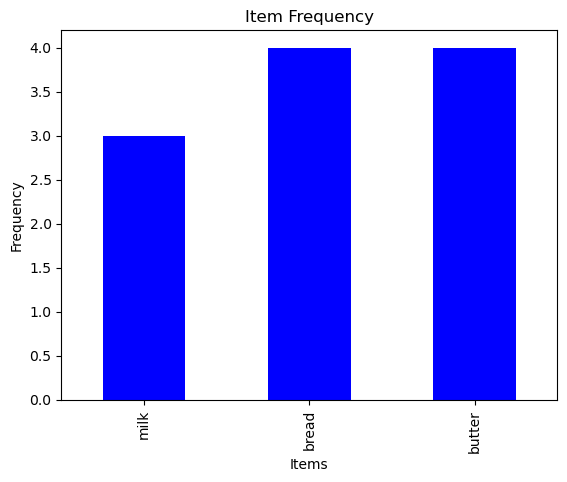

최적의 해: milk      1
bread     1
butter    0
Name: 1, dtype: int64
최적의 적합도: 2.2

평가 결과:
지지도(Support): 0.6666666666666666
신뢰도(Confidence): 1.0
향상도(Lift): 1.5


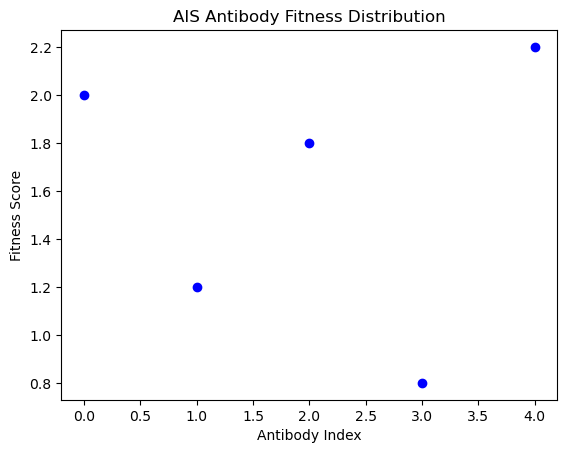

In [ ]:
# [6] AIS(Artificial Immune System)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 생성
data = {
    'TID': [1, 2, 3, 4, 5],
    'milk': [1, 1, 0, 1, 0],
    'bread': [1, 1, 1, 0, 1],
    'butter': [0, 1, 1, 1, 1],
}
df = pd.DataFrame(data).set_index('TID')

# 데이터 시각화
item_counts = df.sum()
item_counts.plot(kind='bar', color='blue')
plt.title('Item Frequency')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.show()

# AIS 알고리즘 설정
population_size = 10         # 초기 항체(해) 개수
num_generations = 10         # 반복할 세대 수
mutation_rate = 0.1          # 돌연변이율
selection_rate = 0.5         # 선택률

# 적합도 함수 정의 (예: milk, bread, butter 구매 조합의 점수화)
def fitness(antibody):
    # 항체의 적합도를 milk, bread, butter의 합으로 정의
    return antibody['milk'] * 1 + antibody['bread'] * 1.2 + antibody['butter'] * 0.8

# 초기 항체(해) 생성 (milk, bread, butter 구매 유무에 따라 항체 구성)
population = [df.sample(1, replace=True).squeeze() for _ in range(population_size)]
fitness_scores = np.array([fitness(antibody) for antibody in population])

# AIS 알고리즘 실행
for generation in range(num_generations):
    # 선택: 상위 selection_rate 비율의 항체만 유지
    num_selected = int(selection_rate * population_size)
    selected_indices = np.argsort(fitness_scores)[-num_selected:]
    selected_population = [population[i] for i in selected_indices]

    # 복제 및 돌연변이
    offspring = []
    for antibody in selected_population:
        # 복제
        cloned = antibody.copy()
        # 돌연변이 적용
        for item in ['milk', 'bread', 'butter']:
            if np.random.rand() < mutation_rate:
                cloned[item] = 1 - cloned[item]  # 0이면 1로, 1이면 0으로 변경
        offspring.append(cloned)

    # 새 세대 생성
    population = offspring
    fitness_scores = np.array([fitness(antibody) for antibody in population])

# 최적의 항체 선택
best_solution = population[np.argmax(fitness_scores)]
best_fitness = fitness(best_solution)

# 결과 출력
print("최적의 해:", best_solution)
print("최적의 적합도:", best_fitness)

# 평가 결과 (유사 지지도, 신뢰도, 향상도)
support = sum(best_solution) / len(best_solution)
confidence = best_fitness / max(fitness_scores)
lift = confidence / (support if support != 0 else 1)

print("\n평가 결과:")
print(f"지지도(Support): {support}")
print(f"신뢰도(Confidence): {confidence}")
print(f"향상도(Lift): {lift}")

# 최종 항체 적합도 분포 시각화
plt.plot(range(len(fitness_scores)), fitness_scores, 'bo')
plt.xlabel("Antibody Index")
plt.ylabel("Fitness Score")
plt.title("AIS Antibody Fitness Distribution")
plt.show()


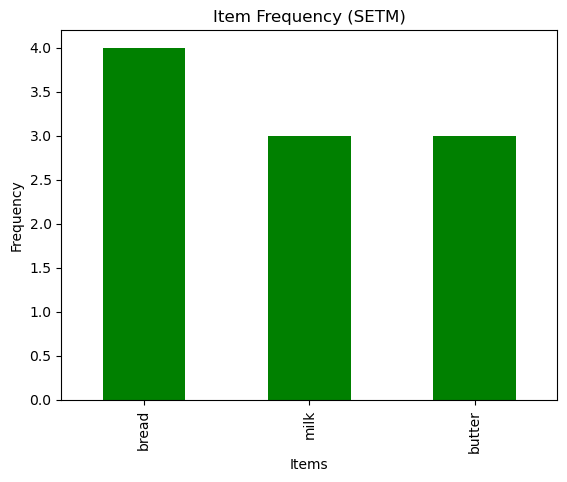

Association Rules (SETM):
  antecedents consequents  support  confidence      lift
0     (bread)      (milk)      0.4    0.500000  0.833333
1      (milk)     (bread)      0.4    0.666667  0.833333
2    (butter)      (milk)      0.4    0.666667  1.111111
3      (milk)    (butter)      0.4    0.666667  1.111111
4    (butter)     (bread)      0.4    0.666667  0.833333
5     (bread)    (butter)      0.4    0.500000  0.833333


In [ ]:
# [7] SETM(Sequential Execution of Transaction Merging)
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt

# 데이터셋 생성
data = {
    'TID': [1, 2, 3, 4, 5],
    'items': [
        ['milk', 'bread'],
        ['milk', 'bread', 'butter'],
        ['bread', 'butter'],
        ['milk', 'butter'],
        ['bread']
    ]
}

# 데이터프레임으로 변환
df = pd.DataFrame(data).set_index('TID')

# 원본 데이터 시각화 (항목별 빈도)
item_counts = pd.Series([item for sublist in df['items'] for item in sublist]).value_counts()
item_counts.plot(kind='bar', color='green')
plt.title('Item Frequency (SETM)')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.show()

# 빈발 항목 집합 계산 (min_support 이상인 항목 집합만 선택)
min_support = 0.4
num_transactions = len(df)
frequent_itemsets = {}

for transaction in df['items']:
    for i in range(1, len(transaction) + 1):
        for combination in combinations(transaction, i):
            combination = frozenset(combination)
            if combination in frequent_itemsets:
                frequent_itemsets[combination] += 1
            else:
                frequent_itemsets[combination] = 1

# 지지도 기반으로 필터링
frequent_itemsets = {itemset: support / num_transactions
                     for itemset, support in frequent_itemsets.items()
                     if support / num_transactions >= min_support}

# 연관 규칙 생성 및 평가
rules = []
for itemset, support in frequent_itemsets.items():
    if len(itemset) > 1:
        for antecedent in combinations(itemset, len(itemset) - 1):
            antecedent = frozenset(antecedent)
            consequent = itemset - antecedent

            # 지지도 계산
            antecedent_support = frequent_itemsets.get(antecedent, 0)
            consequent_support = frequent_itemsets.get(consequent, 0)
            confidence = support / antecedent_support if antecedent_support > 0 else 0
            lift = confidence / consequent_support if consequent_support > 0 else 0

            rules.append({
                'antecedents': antecedent,
                'consequents': consequent,
                'support': support,
                'confidence': confidence,
                'lift': lift
            })

# 결과를 DataFrame으로 변환하여 출력
rules_df = pd.DataFrame(rules)
print("Association Rules (SETM):")
print(rules_df[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


In [1]:
###############################################################
# 주성분 추출 단계 : wine.data
###############################################################

import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# UCI 머신 러닝 저장소에서 Wine 데이터셋을 다운로드할 수 없을 때
# 다음 주석을 해제하고 로컬 경로에서 데이터셋을 적재

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
###############################################################
# 주성분 추출 단계 : 70%는 훈련 세트로 30%는 테스트 세트로 나눈다.
###############################################################

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
                     stratify=y,
                     random_state=0)

In [3]:
###############################################################
# 주성분 추출 단계 : 데이터 표준
###############################################################
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


X_test_std = sc.fit_transform(X_test) 대신에 X_test_std = sc.transform(X_test)를 사용했습니다. 이 경우에 테스트 데이터셋의 평균과 표준편차가 훈련 데이터셋과 매우 비슷하기 때문에 큰 차이가 없습니다. 하지만 3장에서 보았듯이 데이터를 변환할 때 훈련 데이터셋에서 학습한 파라미터를 재사용하는 것이 올바른 방법입니다. 테스트 데이터셋은 "새로운 본 적 없는" 데이터를 의미하기 때문입니다.

초기에 fit_transform(X_test)를 사용했는데 이것은 모델 훈련에서 얻은 파라미터를 재사용하여 새로운 데이터를 표준화하지 않는 일반적인 실수입니다. 왜 이것이 문제가 되는지 간단한 예를 살펴 보겠습니다.

훈련 데이터셋에 1개의 특성("길이")을 가진 샘플 3개가 들어 있다고 가정해 보죠:

train_1: 10 cm -> class_2
train_2: 20 cm -> class_2
train_3: 30 cm -> class_1
mean: 20, std.: 8.2

표준화를 한 후에 변환된 특성 값은 다음과 같습니다:

train_std_1: -1.22 -> class_2
train_std_2: 0 -> class_2
train_std_3: 1.22 -> class_1
그다음 표준화된 길이가 0.6보다 작은 샘플을 class_2로 분류한다고 가정해 보죠(그 외에는 class_1). 지금까지는 좋습니다. 이제 레이블이 없는 3개의 포인트를 분류한다고 가정해 보죠:

new_4: 5 cm -> class ?
new_5: 6 cm -> class ?
new_6: 7 cm -> class ?
훈련 데이터셋에 있는 표준화되기 전의 "길이" 값과 비교해 보면 직관적으로 이 샘플들은 class_2로 보입니다. 하지만 훈련 데이터셋에서 했던 것처럼 평균과 표준편차를 다시 계산하여 표준화하면 아마도 분류기가 샘플 4번과 5번만 class_2로 분류할 것입니다.

new_std_4: -1.22 -> class 2
new_std_5: 0 -> class 2
new_std_6: 1.22 -> class 1
하지만 훈련 데이터셋의 표준화에 사용했던 파라미터를 사용하면 다음과 같은 값을 얻습니다:

example5: -1.84 -> class 2
example6: -1.71 -> class 2
example7: -1.59 -> class 2
5 cm, 6 cm, 7 cm는 훈련 데이터셋에 있는 어떤 것보다도 작습니다. 따라서 훈련 데이터셋을 표준화한 값보다도 훨씬 작은 값으로 표준화되어야 합니다.

In [4]:
###############################################################
# 주성분 추출 단계 : 공분산 행렬의 고윳값 분해
# 설명된 분산비율 : 고유벡터(주성분) 순서대로 정렬
###############################################################
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\n고윳값 \n%s' % eigen_vals)


고윳값 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


위에서 numpy.linalg.eig 함수를 사용해 대칭 공분산 행렬을 고윳값과 고유벡터로 분해했습니다.

>>> eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
이것이 잘못된 것은 아니지만 최적은 아닙니다. 에르미트(Hermetian) 행렬를 위해서 설계된 numpy.linalg.eigh를 사용하는 것이 더 좋습니다. 이 함수는 항상 실수 고윳값을 반환합니다. 수치적으로 약간 덜 안정적인 np.linalg.eig는 비대칭 정방행렬을 분해할 수 있지만 어떤 경우에 복소수 고윳값을 반환할 수 있습니다.

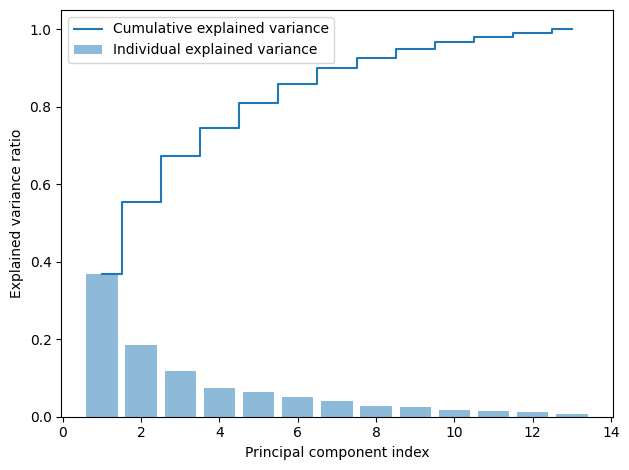

In [5]:
###############################################################
# 주성분 추출 단계 : 총분산과 설명된 분산 13개주성분 -> 3개 차원으로 압축
###############################################################
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt


plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()


In [6]:
################
# 특성 변환
################
# (고윳값, 고유벡터) 튜플의 리스트를 만듭니다
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# 높은 값에서 낮은 값으로 (고윳값, 고유벡터) 튜플을 정렬합니다
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('투영 행렬 W:\n', w)

투영 행렬 W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [ ]:
# (n,13)(13,2) = (n,2)
X_train_std[0].dot(w)

In [ ]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()

[0.36951469 0.18434927 0.11815159 0.07334252 0.06422108 0.05051724
 0.03954654 0.02643918 0.02389319 0.01629614 0.01380021 0.01172226
 0.00820609]


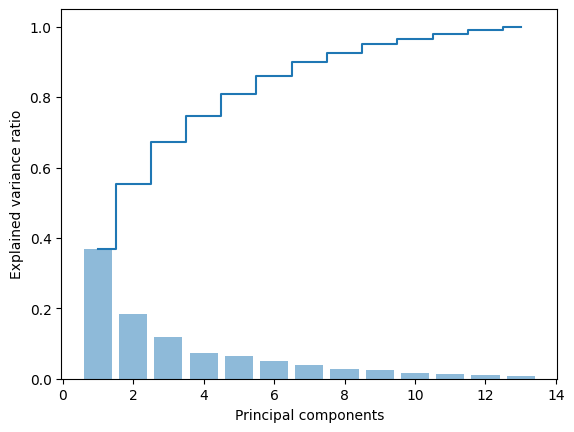

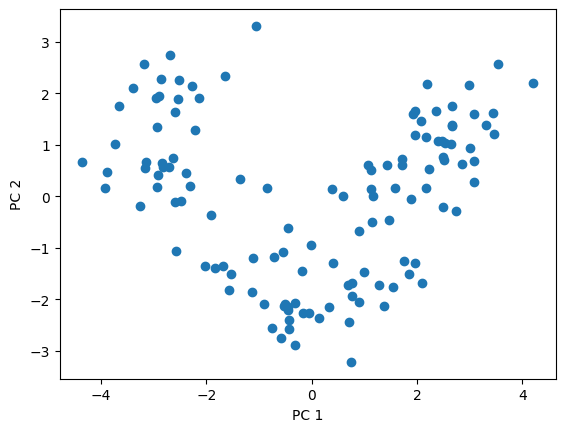

In [7]:
####################################################
# 사이킷런의 주성분 분석
####################################################
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
print(pca.explained_variance_ratio_)

plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()


In [ ]:
###################################
# 로지스틱 회귀 분류기를 훈련
###################################

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 준비합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 클래스별로 샘플을 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    color=cmap(idx),
                    edgecolor=None if idx==1 else 'black',
                    marker=markers[idx],
                    label=cl)

from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(random_state=1)
lr = lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()

In [ ]:
# test set
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_05.png', dpi=300)
plt.show()

In [ ]:
# 13개 주성분 찾기
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

In [ ]:
# n_components에 (0, 1) 사이 실수를 입력하면 설명된 분산의 비율을 나타냅니다. 이 비율을 달성하기 위해 필요한 주성분 개수를 선택합니다.
pca = PCA(n_components=0.95)
pca.fit(X_train_std)
print('주성분 개수:', pca.n_components_)
print('설명된 분산 비율:', np.sum(pca.explained_variance_ratio_))

In [ ]:
# n_components='mle'로 지정하면 토마스 민카(Thomas Minka)가 제안한 차원 선택 방식을 사용합니다(Minka, T. P. “Automatic choice of dimensionality for PCA”. In NIPS, pp. 598-604).
pca = PCA(n_components='mle')
pca.fit(X_train_std)
print('주성분 개수:', pca.n_components_)
print('설명된 분산 비율:', np.sum(pca.explained_variance_ratio_))

PCA의 가장 큰 제약 사항 중 하나는 배치로만 실행되기 때문에 대용량 데이터셋을 처리하려면 많은 메모리가 필요합니다. IncrementalPCA를 사용하면 데이터셋의 일부를 사용하여 반복적으로 훈련할 수 있습니다.

partial_fit() 메서드는 네트워크나 로컬 파일 시스템으로부터 조금씩 데이터를 받아와 훈련할 수 있습니다. fit() 메서드는 numpy.memmap을 사용하여 로컬 파일로부터 데이터를 조금씩 읽어 올 수 있습니다. 한 번에 읽어 올 데이터 크기는 IncrementalPCA 클래스의 batch_size로 지정합니다. 기본값은 특성 개수의 5배입니다.

IncrementalPCA의 n_components 매개변수는 정수 값만 입력할 수 있습니다. 다음은 partial_fit() 메서드를 사용하여 앞의 PCA로 찾은 주성분의 결과와 비교하는 간단한 예입니다.

In [ ]:
# 점진적으로 훈련데이터를 사용
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=9)
for batch in range(len(X_train_std)//25+1):
    X_batch = X_train_std[batch*25:(batch+1)*25]
    ipca.partial_fit(X_batch)

print('주성분 개수:', ipca.n_components_)
print('설명된 분산 비율:', np.sum(ipca.explained_variance_ratio_))

In [ ]:
############################
# 선형판별분석
# 레이블이 필요(지도학습)
############################
# 1. 표준화 전처리
# 2. 클래스별 평균 벡터(지도학습)
# 3. 클래스 간 산포 행렬 S_B, 클래스 내 산포 행렬 S_W
# 4. S_W^-1S_B행렬의 고윳값
# 5. 고윳값을 내림차순 정렬
# 6. 고윳값이 가장 큰 k개의 고유 벡터 선택
# 7. 고유 벡터로 만든 변환 행렬로 데이터셋 투영


# 산포 행렬 계산
np.set_printoptions(precision=4)

mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

In [ ]:
# 클래스 내 산포 행렬을 계산
d = 13 # 특성의 수
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # 각 클래스에 대한 산포 행렬
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # 열 벡터를 만듭니다
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # 클래스 산포 행렬을 더합니다

print('클래스 내의 산포 행렬: %sx%s' % (S_W.shape[0], S_W.shape[1]))

In [ ]:
# 클래스가 균일하게 분포되어 있지 않기 때문에 공분산 행렬을 사용하는 것이 더 낫다:
print('클래스 레이블 분포: %s'
      % np.bincount(y_train)[1:])

In [ ]:
d = 13  # 특성의 수
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('스케일 조정된 클래스 내의 산포 행렬: %sx%s' %
      (S_W.shape[0], S_W.shape[1]))

In [ ]:
# 클래스 간 산포 행렬을 계산
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)  # 열 벡터로 만들기
d = 13  # 특성 개수
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # 열 벡터로 만들기
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('클래스 간의 산포 행렬: %sx%s' % (S_B.shape[0], S_B.shape[1]))

In [ ]:
# 새로운 특성 부분 공간을 위해 선형 판별 벡터 선택
# 고윳값의 역순으로 고유 벡터를 정렬합니다(판별 벡터의 개수 = 클래스 개수 - 1):
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [ ]:
# (고윳값, 고유벡터) 튜플의 리스트를 만듭니다.
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# (고윳값, 고유벡터) 튜플을 큰 값에서 작은 값 순서대로 정렬합니다.
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# 고윳값의 역순으로 올바르게 정렬되었는지 확인합니다.
print('내림차순의 고윳값:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

In [ ]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='Individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='Cumulative "discriminability"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_07.png', dpi=300)
plt.show()

In [ ]:
# 변환행렬
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('행렬 W:\n', w)

In [ ]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('images/05_08.png', dpi=300)
plt.show()


In [ ]:
#############################
# 사이킷런의 LDA
#############################
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1)
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_09.png', dpi=300)
plt.show()


In [ ]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_10.png', dpi=300)
plt.show()

In [ ]:
####################################
# 파이썬으로 커널 PCA 구현
####################################

from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
import numpy as np

from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version

# scipy 2.0.0에서 삭제될 예정이므로 대신 numpy.exp를 사용합니다.
if scipy_version >= Version('1.4.1'):
    from numpy import exp
else:
    from scipy import exp


def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF 커널 PCA 구현

    매개변수
    ------------
    X: {넘파이 ndarray}, shape = [n_samples, n_features]

    gamma: float
      RBF 커널 튜닝 매개변수

    n_components: int
      반환할 주성분 개수

    반환값
    ------------
     X_pc: {넘파이 ndarray}, shape = [n_samples, k_features]
       투영된 데이터셋

    """
    # MxN 차원의 데이터셋에서 샘플 간의 유클리디안 거리의 제곱을 계산합니다.
    sq_dists = pdist(X, metric='sqeuclidean')

    # 샘플 간의 거리를 정방 대칭 행렬로 변환합니다.
    mat_sq_dists = squareform(sq_dists)

    # 커널 행렬을 계산합니다.
    K = exp(-gamma * mat_sq_dists)

    # 커널 행렬을 중앙에 맞춥니다.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # 중앙에 맞춰진 커널 행렬의 고윳값과 고유벡터를 구합니다.
    # scipy.linalg.eigh 함수는 오름차순으로 반환합니다.
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    # 최상위 k 개의 고유벡터를 선택합니다(결과값은 투영된 샘플입니다).
    X_pc = np.column_stack([eigvecs[:, i]
                            for i in range(n_components)])

    return X_pc

In [ ]:
# 예제 1: 반달 모양 구분하기
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('images/05_12.png', dpi=300)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_13.png', dpi=300)
plt.show()

In [ ]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50, 1))+0.02,
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50, 1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_14.png', dpi=300)
plt.show()

In [ ]:
# 예제 2: 동심원 분리하기
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('images/05_15.png', dpi=300)
plt.show()

In [ ]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_16.png', dpi=300)
plt.show()

In [ ]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_17.png', dpi=300)
plt.show()

In [ ]:
################################
# 새로운 데이터 포인트 투영하기
# 고윳값 반환 추가
################################

from scipy.spatial.distance import pdist, squareform
from numpy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF 커널 PCA 구현

    매개변수
    ------------
    X: {넘파이 ndarray}, shape = [n_samples, n_features]

    gamma: float
      RBF 커널 튜닝 매개변수

    n_components: int
      반환할 주성분 개수

    Returns
    ------------
     alphas: {넘파이 ndarray}, shape = [n_samples, k_features]
       투영된 데이터셋

     lambdas: list
       고윳값

    """
    # MxN 차원의 데이터셋에서 샘플 간의 유클리디안 거리의 제곱을 계산합니다.
    sq_dists = pdist(X, 'sqeuclidean')

    # 샘플 간의 거리를 정방 대칭 행렬로 변환합니다.
    mat_sq_dists = squareform(sq_dists)

    # 커널 행렬을 계산합니다.
    K = exp(-gamma * mat_sq_dists)

    # 커널 행렬을 중앙에 맞춥니다.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # 중앙에 맞춰진 커널 행렬의 고윳값과 고유 벡터를 구합니다.
    # scipy.linalg.eigh 함수는 오름차순으로 반환합니다.
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    # 최상위 k 개의 고유 벡터를 선택합니다(투영 결과).
    alphas = np.column_stack([eigvecs[:, i]
                              for i in range(n_components)])

    # 고유 벡터에 상응하는 고윳값을 선택합니다.
    lambdas = [eigvals[i] for i in range(n_components)]

    return alphas, lambdas

In [ ]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

# 새로운 데이터셋
x_new = X[25]
print("새로운 데이터", x_new)
x_proj = alphas[25] # 원본 투영
print("원본 투영", x_proj)

def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new - row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

# 새로운 데이터포인트를 투영합니다.
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
print("새로운 데이터포인트를 투영", x_reproj)

plt.scatter(alphas[y == 0, 0], np.zeros((50)),
            color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y == 1, 0], np.zeros((50)),
            color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black',
            label='Original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green',
            label='Remapped point X[25]', marker='x', s=500)
plt.yticks([], [])
plt.legend(scatterpoints=1)

plt.tight_layout()
# plt.savefig('images/05_18.png', dpi=300)
plt.show()

In [ ]:
#########################################
# 사이킷런의 커널 PCA
#########################################
from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
# plt.savefig('images/05_19.png', dpi=300)
plt.show()


$k=XX^T=USV^T(VSU^T)=US^2U^T$ <br>
$a=U$<br>
$\lambda = S^2$<br>
$X'=US=a\sqrt{\lambda}$<br>

#새로운 데이터<br>
$xV=xVSU^TUS^{-1} =xX^TUS^{-1}=k US^{-1}=kal\sqrt{\lambda}$

In [ ]:
# 사이킷런의 매니폴드 알고리즘을 반달 모양 데이터셋과 동심원 데이터셋에 적용
# 먼저 변환된 2차원 데이터셋을 그래프로 그리기 위한 간단한 함수를 정의
def plot_manifold(X, y, savefig_name):

    plt.scatter(X[y == 0, 0], X[y == 0, 1],
                color='red', marker='^', alpha=0.5)
    plt.scatter(X[y == 1, 0], X[y == 1, 1],
                color='blue', marker='o', alpha=0.5)

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.tight_layout()
    # plt.savefig(savefig_name, dpi=300)
    plt.show()


#지역 선형 임베딩(Locally Linear Embedding)은 이웃한 샘플 간의 거리를 유지하는 저차원 투영을 찾기
#지역 선형 임베딩을 구현한 사이킷런의 LocallyLinearEmbedding 클래스를 앞에서 적재한 반달 모양 데이터셋에 적용
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, random_state=1)
X_lle = lle.fit_transform(X)

plot_manifold(X_lle, y, 'images/05_lle_moon.png')

In [ ]:
#t-SNE(t-distributed Stochastic Neighbor Embedding)는
#데이터 포인트 간의 유사도를 결합 확률(joint probability)로 변환하고,
#저차원과 고차원의 확률 사이에서 쿨백-라이블러(Kullback-Leibler) 발산을 최소화
#t-SNE는 특히 고차원 데이터셋을 시각화하는데 뛰어난 성능을 냅니다. 사이킷런에는 TSNE 클래스에 구현
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X)

plot_manifold(X_tsne, y, 'images/05_tsne_moon.png')

In [ ]:
#KernelPCA, LocallyLinearEmbedding, TSNE를 동심원 데이터셋에 적용
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plot_manifold(X_skernpca, y, 'images/05_kpca_circles.png')

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, random_state=1)
X_lle = lle.fit_transform(X)

plot_manifold(X_lle, y, 'images/05_lle_circles.png')

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X)

plot_manifold(X_tsne, y, 'images/05_tsne_circles.png')

In [ ]:
#붓꽃 데이터로 PCA 변환을 위한 데이터 로딩 및 시각화
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

In [ ]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [ ]:
#평균이 0, 분산이 1인 정규 분포로 원본 데이터를 변환
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [ ]:
irisDF.shape


In [ ]:
iris_scaled.shape

In [ ]:
#PCA 변환 수행
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

In [ ]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

In [ ]:
#PCA로 차원 축소된 피처들로 데이터 산포도 시각화
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행.
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [ ]:
#각 PCA Component별 변동성 비율
print(pca.explained_variance_ratio_)

In [ ]:
#원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

In [ ]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

In [ ]:
######################################
# 신용카드 데이터 세트 PCA 변환
######################################
# 데이터 로드 및 컬럼명 변환
# header로 의미없는 첫행 제거, iloc로 기존 id 제거

!pip install xlrd
import pandas as pd
pd.set_option('display.max_columns', 30)

df = pd.read_excel('pca_credit_card.xls', header=1, sheet_name='Data').iloc[:,1:]
print(df.shape)
df.head(3)


In [ ]:
# 컴럼명 변경
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

In [ ]:
X_features.info()

In [ ]:
X_features.corr()

In [ ]:
# 피처간 상관도 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))

sns.heatmap(corr, annot=True, fmt='.1g')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

In [ ]:
# 시간이 오래 소요됨
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행.
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

In [ ]:
###############################
# 붓꽃 데이터 셋에 LDA 적용하기
###############################
# LDA는 비지도학습이 아님
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)


In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
# fit()호출 시 target값 입력  # LDA는 비지도학습이 아님
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행.
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [ ]:
#####################
# SVD

# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

In [ ]:
# SVD 행렬 분해
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

In [ ]:
#분해된 행렬들을 이용하여 다시 원행렬로 원복
# Sima를 다시 0 을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

In [ ]:
##########################################
# compact SVD
##########################################
#데이터 의존도가 높은 원본 데이터 행렬 생성
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

In [ ]:
# 다시 SVD를 수행하여 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

In [ ]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

In [ ]:
###################################
# Truncated SVD 를 이용한 행렬 분해
###################################
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components = 5
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

In [ ]:
# 사이킷런 TruncatedSVD 클래스를 이용한 변환
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

In [ ]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [ ]:
##############
# NMF
##############
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)

nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

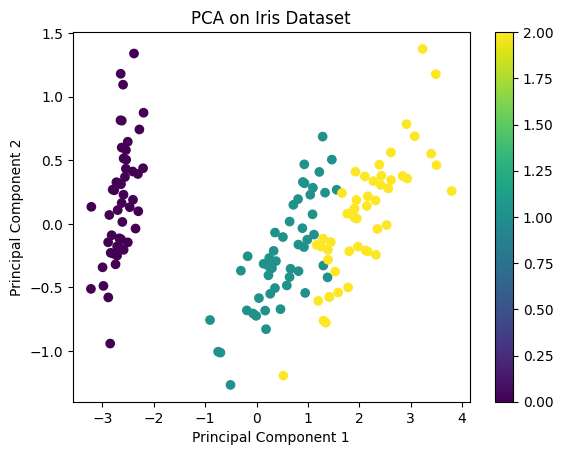

Explained Variance Ratio: [0.92461872 0.05306648]
Total Variance Retained: 0.9776852063187977


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# 데이터 로드
data = load_iris()
X = data.data

# PCA 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 결과 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data.target)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Iris Dataset")
plt.colorbar()
plt.show()

# 분산 유지율 출력
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Retained:", sum(pca.explained_variance_ratio_))

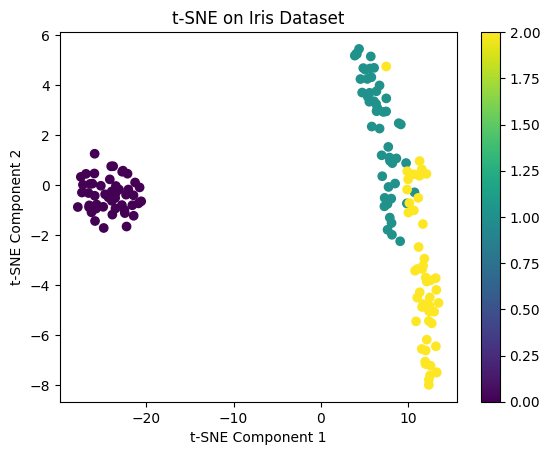

In [9]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris

# 데이터 로드
data = load_iris()
X = data.data

# t-SNE 적용
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# 결과 시각화
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data.target)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE on Iris Dataset")
plt.colorbar()
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


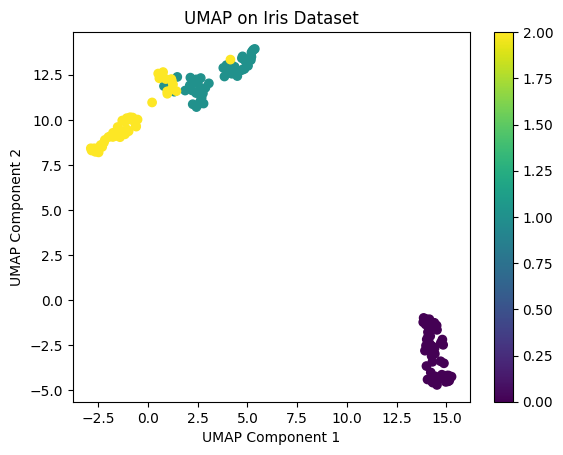

In [11]:
!pip install umap-learn

import umap
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 데이터 로드
data = load_iris()
X = data.data

# UMAP 적용
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

# 결과 시각화
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=data.target)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP on Iris Dataset")
plt.colorbar()
plt.show()

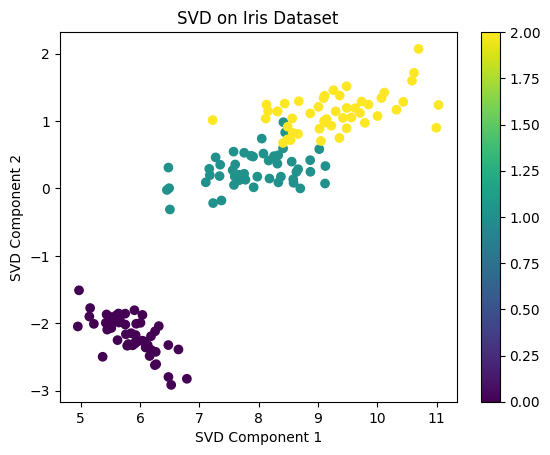

Explained Variance Ratio: [0.52875361 0.44845576]
Total Variance Retained: 0.9772093692426485


In [12]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 데이터 로드
data = load_iris()
X = data.data

# SVD 적용
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# 결과 시각화
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=data.target)
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.title("SVD on Iris Dataset")
plt.colorbar()
plt.show()

# 분산 유지율 출력
print("Explained Variance Ratio:", svd.explained_variance_ratio_)
print("Total Variance Retained:", sum(svd.explained_variance_ratio_))

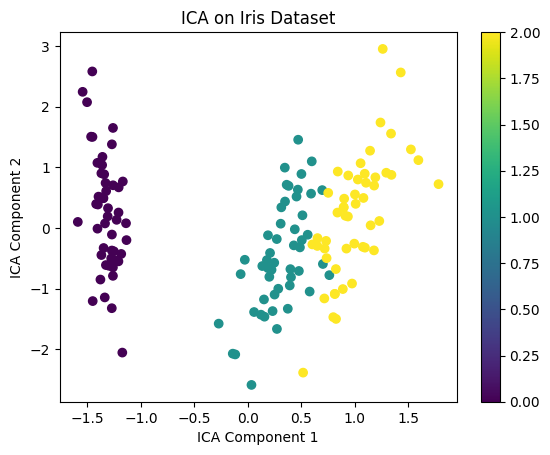

In [13]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 데이터 로드
data = load_iris()
X = data.data

# ICA 적용
ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X)

# 결과 시각화
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=data.target)
plt.xlabel("ICA Component 1")
plt.ylabel("ICA Component 2")
plt.title("ICA on Iris Dataset")
plt.colorbar()
plt.show()

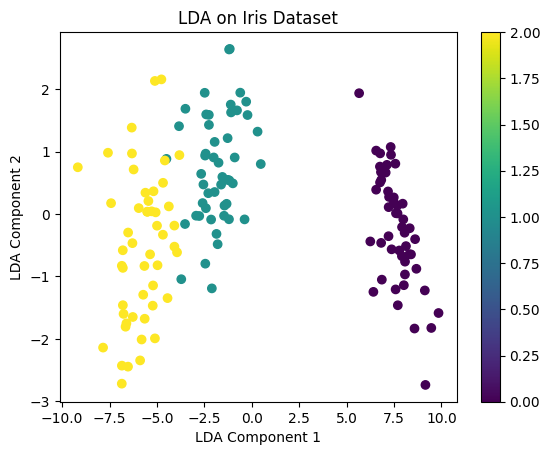

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 데이터 로드
data = load_iris()
X = data.data
y = data.target

# LDA 적용
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# 결과 시각화
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA on Iris Dataset")
plt.colorbar()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


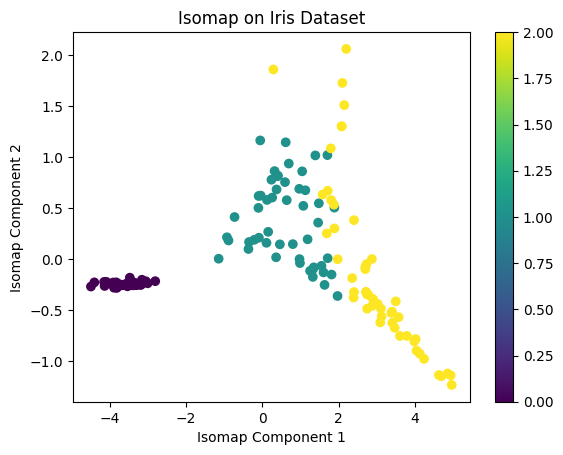

In [15]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 데이터 로드
data = load_iris()
X = data.data

# Isomap 적용
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

# 결과 시각화
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=data.target)
plt.xlabel("Isomap Component 1")
plt.ylabel("Isomap Component 2")
plt.title("Isomap on Iris Dataset")
plt.colorbar()
plt.show()

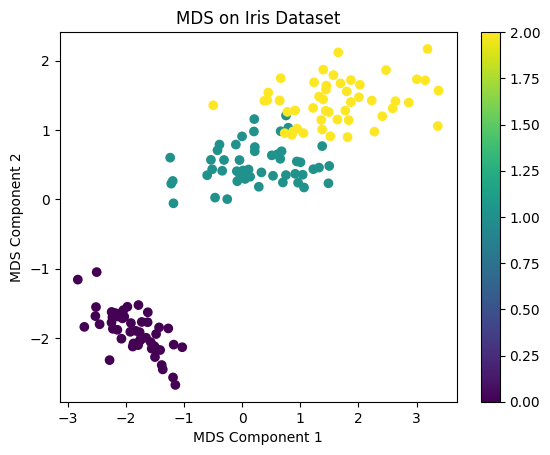

In [16]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 데이터 로드
data = load_iris()
X = data.data

# MDS 적용
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)

# 결과 시각화
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=data.target)
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.title("MDS on Iris Dataset")
plt.colorbar()
plt.show()

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=6c3029c2c70d7e27e1361aaf8d1d9c062d4999368e164347e6f87e97b2a733d7
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


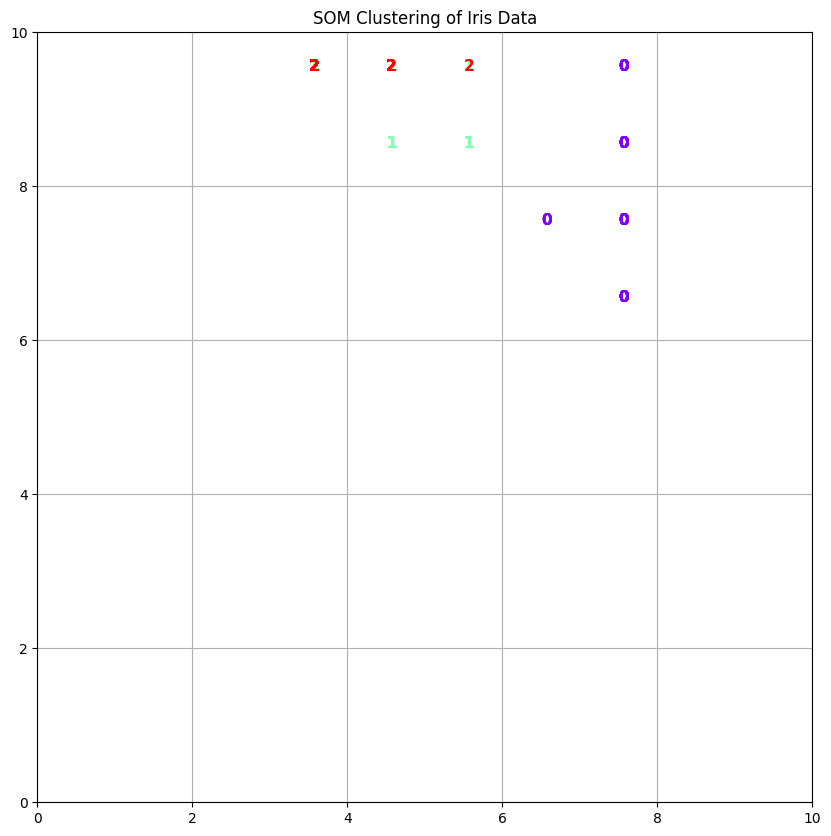

In [17]:
!pip install minisom

from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

# 데이터 로드 및 정규화
data = load_iris()
X = data.data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# SOM 초기화 및 학습
som = MiniSom(x=10, y=10, input_len=4, sigma=1.0, learning_rate=0.5, random_seed=42)
som.train_random(X_scaled, 100)  # 100회 반복 학습

# SOM 시각화
plt.figure(figsize=(10, 10))
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plt.text(w[0] + 0.5, w[1] + 0.5, str(data.target[i]),
    color=plt.cm.rainbow(data.target[i] / 2.0),
    fontdict={'weight': 'bold', 'size': 11})

plt.title("SOM Clustering of Iris Data")
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.grid()
plt.show()